SLR

In [1]:
import pandas as pd
import numpy as np
mba_salary_df = pd.read_excel( 'mba_salary.xlsx' )
mba_salary_df.head( 10 )

,S.No,Percentage in grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [2]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No                    50 non-null     int64  
 1   Percentage in grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [3]:
import statsmodels.api as sm

In [4]:
X = sm.add_constant( mba_salary_df['Percentage in grade 10'] )
X.head()

,const,Percentage in grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [5]:
Y = mba_salary_df['Salary']

In [6]:
!pip install sklearn

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,train_size = 0.8,random_state = 0 )

In [9]:
mba_lm = sm.OLS( train_y, train_X ).fit()

In [10]:
train_X

,const,Percentage in grade 10
33,1.0,78.00
35,1.0,56.00
26,1.0,50.00
34,1.0,50.08
18,1.0,70.00
7,1.0,68.00
14,1.0,68.00
45,1.0,57.58
48,1.0,66.00
29,1.0,67.00


In [11]:
print( mba_lm.params )

const                     41884.187683
Percentage in grade 10     3384.073914
dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

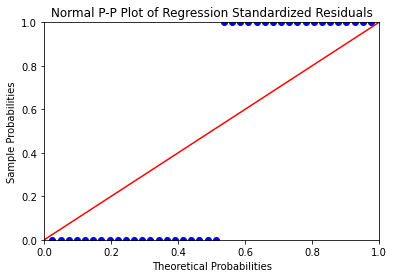

In [13]:
mba_salary_resid = mba_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
plt.figure( figsize = (8, 6))
probplot.ppplot( line='45' )
plt.title("Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

OUTLIER ANALYSIS

In [14]:
from scipy.stats import zscore

In [15]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [16]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S.No,Percentage in grade 10,Salary,z_score_salary


In [18]:
pred_y = mba_lm.predict( test_X )

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))

0.13516740049840847

In [20]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))

67441.82746627665